# JHU Practical Machine Learning
Course URL: https://www.coursera.org/learn/practical-machine-learning/home/welcome

### I. Examining a dataset for prediction
###### Basic ML Workflow
question -> input data -> features -> algorithm -> parameters -> evaluation
###### SPAM Example

In [1]:
# 1. Load and examine dataset
library(kernlab)
data(spam)
paste('Columns: ', length(names(spam)))
head(spam)

[1] "Columns:  58"

make,address,all,num3d,our,over,remove,internet,order,mail,⋯,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,spam
0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam


In [2]:
# This dataset is an example of what could be used as training data for a classification problem.
# Interestingly, all variables except for 1 are features. The remaining one is the labeled classification.
?spam

In [3]:
names(spam)

[1] "make"              "address"           "all"              
 [4] "num3d"             "our"               "over"             
 [7] "remove"            "internet"          "order"            
[10] "mail"              "receive"           "will"             
[13] "people"            "report"            "addresses"        
[16] "free"              "business"          "email"            
[19] "you"               "credit"            "your"             
[22] "font"              "num000"            "money"            
[25] "hp"                "hpl"               "george"           
[28] "num650"            "lab"               "labs"             
[31] "telnet"            "num857"            "data"             
[34] "num415"            "num85"             "technology"       
[37] "num1999"           "parts"             "pm"               
[40] "direct"            "cs"                "meeting"          
[43] "original"          "project"           "re"               
[46] "edu"               "table"             "conference"       
[49] "charSemicolon"     "charRoundbracket"  "charSquarebracket"
[52] "charExclamation"   "charDollar"        "charHash"         
[55] "capitalAve"        "capitalLong"       "capitalTotal"     
[58] "type"

In [4]:
str(spam)

'data.frame':	4601 obs. of  58 variables:
 $ make             : num  0 0.21 0.06 0 0 0 0 0 0.15 0.06 ...
 $ address          : num  0.64 0.28 0 0 0 0 0 0 0 0.12 ...
 $ all              : num  0.64 0.5 0.71 0 0 0 0 0 0.46 0.77 ...
 $ num3d            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ our              : num  0.32 0.14 1.23 0.63 0.63 1.85 1.92 1.88 0.61 0.19 ...
 $ over             : num  0 0.28 0.19 0 0 0 0 0 0 0.32 ...
 $ remove           : num  0 0.21 0.19 0.31 0.31 0 0 0 0.3 0.38 ...
 $ internet         : num  0 0.07 0.12 0.63 0.63 1.85 0 1.88 0 0 ...
 $ order            : num  0 0 0.64 0.31 0.31 0 0 0 0.92 0.06 ...
 $ mail             : num  0 0.94 0.25 0.63 0.63 0 0.64 0 0.76 0 ...
 $ receive          : num  0 0.21 0.38 0.31 0.31 0 0.96 0 0.76 0 ...
 $ will             : num  0.64 0.79 0.45 0.31 0.31 0 1.28 0 0.92 0.64 ...
 $ people           : num  0 0.65 0.12 0.31 0.31 0 0 0 0 0.25 ...
 $ report           : num  0 0.21 0 0 0 0 0 0 0 0 ...
 $ addresses        : num  0 0.14 1.75 0 0

In [5]:
c(min(spam$your), max(spam$your))

[1]  0.00 11.11

In [6]:
density(spam$your[spam$type=="nonspam"])


Call:
	density.default(x = spam$your[spam$type == "nonspam"])

Data: spam$your[spam$type == "nonspam"] (2788 obs.);	Bandwidth 'bw' = 0.06322

       x                 y           
 Min.   :-0.1897   Min.   :0.000000  
 1st Qu.: 2.5827   1st Qu.:0.000459  
 Median : 5.3550   Median :0.003009  
 Mean   : 5.3550   Mean   :0.089983  
 3rd Qu.: 8.1273   3rd Qu.:0.030547  
 Max.   :10.8997   Max.   :4.061939  

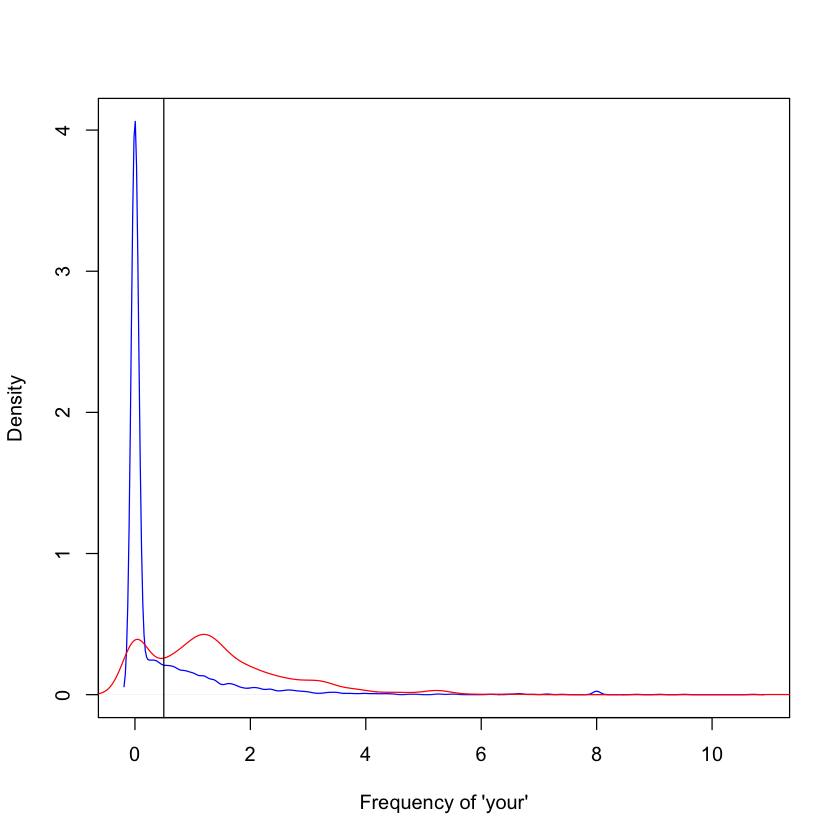

In [7]:
# Y axis = Density of being spam (blue) or not spam (red)
plot(density(spam$your[spam$type=="nonspam"]), col="blue", main="", xlab="Frequency of 'your'")
lines(density(spam$your[spam$type=="spam"]), col="red")
# Perhaps above a 0.5 "uses of 'your'"/e-mail frequency cutoff is good for classifying as spam? Of course though, there's no such thing as "0.5" uses of a word in an e-mail? Unless perhaps the dataset means multiple e-mails from the same person.
abline(v=0.5, col="black")

In [8]:
summary(spam$type)

nonspam    spam 
   2788    1813

### II. Evaluating predictive models
#### II.A Key Quantities
###### Evaluating Accuracy of a Binary Classifier
The binary here is spam/nonspam. Outcome of classification will have 4 values: True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN).

**Error Evaluation Metrics: Key Quantities**
- Sensitivity --> TP / (TP + FN)
- Specificity --> TN / (TN + FP)
- Positive Predictive Value --> TP / (TP + FP)
- Negative Predictive Value --> FP / (FP + TN)
- Accuracy --> (TN + TP) / (TN + TP + FN + FP)

This is apparently an "optimistic" estimate of the overall error rate, which I will learn about later in the course.

In [10]:
prediction <- ifelse(spam$your > 0.5, 'spam', 'nonspam')
paste('Predicted Spam: ', length(prediction[prediction=='spam']), ' / ', 'Predicted Non-spam: ', length(prediction[prediction=='nonspam']))
prediction_table <- table(prediction, spam$type)/length(spam$type)
prediction_table
paste('Accuracy: ', (prediction_table['spam', 'spam'] + prediction_table['nonspam', 'nonspam']) / (prediction_table['spam', 'spam'] + prediction_table['nonspam', 'nonspam'] + prediction_table['nonspam', 'spam'] + prediction_table['spam', 'nonspam']))

[1] "Predicted Spam:  2021  /  Predicted Non-spam:  2580"

          
prediction   nonspam      spam
   nonspam 0.4590306 0.1017170
   spam    0.1469246 0.2923278

[1] "Accuracy:  0.75135840034775"

#### II.B Types of Error Metrics
#### 1. For continuous and discrete data
###### Key quantities: Sensitivity
If you want few false positives.

###### Key quantities: Specificity
If you want few false negatives. Widely used in medicine.

###### Key quantities: Accuracy
If you weight false positives and negatives equally.

###### Concordance
E.g. Kappa. I think this may be similar to James' nugget of enlightenment, i.e. the different people trying to report on the same data submit the same answer, rather than different answers.

#### 2. For continuous data
Not useful in situations where:
- Lots of outliers.
- Values of variables can have very different scales.

###### Mean Squared Error (MSE)
$\frac{1}{n} \sum\limits_{i=1}^n (Prediction_i - Truth_i)^2$  
Read: Mean of the square of the sum of $n$ instances of $(Prediction_i - Truth_i)$.  
Helps answer the question: *How close are we to the truth?*  

###### Root Mean Squared Error (RMSE)
$\sqrt{\frac{1}{n} \sum\limits_{i=1}^n (Prediction_i - Truth_i)^2}$  
Read: Square root of the mean of the square of the sum of $n$ instances of $(Prediction_i - Truth_i)$.

###### Median Absolute Deviation
Often more robust.

#### Mistakes in error evaluation
###### Using the wrong evaluative metric (key quantity) in the wrong context
All of these are actually useful to know in different situations. And it's important to know that the size of the population can have an affect on these metrics. Even if the accuracy of the test does not change between two sample sizes, the other metrics can change. Plugging different numbers "n_i" where "i" is one of TP, TN, FP, or FN, this can be observed.

#### II.C ROC (Receiver Operating Characteristic) Curves
For measuring quality of a prediciton algorithm.

Since we're actually measuring the probability of an outcome, the *cutoff* (e.g. >.95, >.999, etc.) chosen produces different results. The RoC curve is a measure of how leaning towards a cutoff and how that affects false negatives and positives.

#### AUCs (Area Under the Curve)
Measuring the total area on one or the other side of the curve is a good method of evaluation. Farther toward upper left hand of plot, the better.

###### Example AUCs
- <0.5: Worse than random guessing.
- 0.5: Random guessing.
- \>0.8: Generally considered good, though varies given field/situation.
- 1: Perfect classifier.

### III. Resampling (Cross Validation, Bootstrapping, etc.)
https://stats.stackexchange.com/questions/18348/differences-between-cross-validation-and-bootstrapping-to-estimate-the-predictio  
One of the most widely used tools for:
- Detecting relevant features / picking variables for model.
- Building models.
  - Picking the type of predictive function to use.
  - Preparing different predictors.
- Estimating model parameters (for the predictive function).

Cross validation helps us to address the problem of accuracy on the training set, called *resubstitution accuracy*, being optimistic. What we want to do is use the training set accuracy to ideally predict as much as possible how our accuracy will be in the real world, so that we only need to evaluate on the test set once to get the out-of-sample error.

#### Steps
Training set --> Split the training set into training / pre-production test sets --> Build model on training set --> Evaluate on test set --> Repeat and average in-sample estimated errors

After repeating this process as many times as necessary, we can try out on a new, fresh test set. Ideally proportion, iirc, is 60% training, 20% first test, 20% final test, but requires "a lot" of data. Otherwise, can do 80% training and 20% for a final test.

#### Strategies for optimizing model through evaluation
These strategies should work for non-time series data. For that kind of data, you will want to use chunks.

###### Random sub-sampling
Take the training set we have, and randomly sample some % of the observations to use for training, and the remainder for test. On each iteration, choose different random subsets of the sample, leave the model as is and randomly sample, train, and then evaluate error. Do this a number of times, and then average the error between all iterations to see if we need to change the model.

Random sampling w/ replacement
Should be done by default. Meaning you keep sub-sampling and breaking your dataset into smaller and smaller sub-samples until you have nothing left.

The Bootstrap (random sampling without replacement)
You can do random sampling with replacement (think rolling a dice; you can roll randomly forever), but there is some error in the fact that you could sample the same data twice. To correct for this error, you must use a complciated method called *0.632 Bootstrap*.

###### K-fold
Break up the entire sample into $K$ equal size datasets.

Larger $K$ means less bias and more variance. The inverse for smaller $K$.

###### Leave one out
Just leave one sample (observation) out, train on all the data except for this one, and predict for this one; repeat.


### IV. Generalized Linear Model (Intro)

In [12]:
# Split data
library(caret); library(kernlab); data(spam)
# createDataPartition: p is for % of dataset for training.
inTrain <- createDataPartition(y=spam$type, p=0.75, list=FALSE)
training <- spam[inTrain, ]
testing <- spam[-inTrain, ]
dim(training)

[1] 3451   58

In [14]:
# Train model
set.seed(32343)
# GLM (Generalized Linear Model)
# The parameters "type ~." means: "use all the other variables in the data frame to predict 'type'."
# The left hand is the dependent variable, the right hand is the independent variable. Much like y = bx + c means that y ~ x.
modelFit <- train(type ~., data=training, method='glm')
modelFit

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

Generalized Linear Model 

3451 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3451, 3451, 3451, 3451, 3451, 3451, ... 
Resampling results:

  Accuracy   Kappa   
  0.9232705  0.838551


In [15]:
modelFit$finalModel


Call:  NULL

Coefficients:
      (Intercept)               make            address                all  
       -1.581e+00         -4.516e-01         -1.380e-01          6.744e-02  
            num3d                our               over             remove  
        2.556e+00          4.592e-01          6.545e-01          1.904e+00  
         internet              order               mail            receive  
        5.578e-01          5.505e-01          5.366e-02         -3.746e-01  
             will             people             report          addresses  
       -1.776e-01         -6.233e-02         -7.116e-02          2.061e+00  
             free           business              email                you  
        1.558e+00          7.764e-01          6.585e-02          1.170e-01  
           credit               your               font             num000  
        8.546e-01          2.435e-01          1.883e-01          3.679e+00  
            money                 hp            

###### Confusion Matrix ("Classifier Accuracy Matrix")
http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/  
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

In [18]:
# Newdata parameter: predict.lm produces predicted values, obtained by evaluating the regression function in the frame newdata (which defaults to model.frame(object). 
predictions <- predict(modelFit, newdata=testing)
head(predictions)
confusionMatrix(predictions, testing$type)

[1] spam    spam    spam    spam    spam    nonspam
Levels: nonspam spam

Confusion Matrix and Statistics

          Reference
Prediction nonspam spam
   nonspam     663   55
   spam         34  398
                                          
               Accuracy : 0.9226          
                 95% CI : (0.9056, 0.9374)
    No Information Rate : 0.6061          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8366          
 Mcnemar's Test P-Value : 0.03401         
                                          
            Sensitivity : 0.9512          
            Specificity : 0.8786          
         Pos Pred Value : 0.9234          
         Neg Pred Value : 0.9213          
             Prevalence : 0.6061          
         Detection Rate : 0.5765          
   Detection Prevalence : 0.6243          
      Balanced Accuracy : 0.9149          
                                          
       'Positive' Class : nonspam         
                                          

### V. Data Splitting

###### Simple data partitioning
Parameters: y = dependent variable to predict, p = percentage of data to use for training, list = logical, should the results be in a list (‘TRUE’) or a matrix with the number of rows equal to `‘floor(p *length(y))’` (basically means "the percent rows in the predictee column") and ‘times’ columns.

In [29]:
# inTrain <- createDataPartition(y=spam$type, p=0.75, list=FALSE)

###### K-folds

In [28]:
set.seed(32323)
# returnTrain = return training set? If false, returns test set instead.
folds <- createFolds(y=spam$type, k=10, list=TRUE, returnTrain=TRUE)
sapply(folds[1:3], length)
sapply(folds, head)
head(folds[[1]])
folds[[1]][1:10]
folds <- createFolds(y=spam$type, k=10, list=TRUE, returnTrain=FALSE)
sapply(folds[1:3], length)
folds[[1]][1:10]

Fold01 Fold02 Fold03 
  4141   4140   4141

Fold01,Fold02,Fold03,Fold04,Fold05,Fold06,Fold07,Fold08,Fold09,Fold10
1,1,1,1,1,1,1,1,2,1
2,3,2,2,2,2,2,2,3,2
3,4,3,3,4,3,3,3,4,3
4,5,4,4,5,4,4,5,5,4
5,6,5,5,6,5,7,6,6,5
6,7,6,6,7,6,8,7,7,6


[1] 1 2 3 4 5 6

[1]  1  2  3  4  5  6  7  8  9 10

Fold01 Fold02 Fold03 
   460    459    460

[1]  19  21  51  54  63  69  72  80  92 102

###### Resampling w/ Bootstrapping

In [38]:
set.seed(32323)
folds <- createResample(y=spam$type, times=10, list=TRUE)
sapply(folds[1:2], length)
folds[[1]][1:10]

Resample01 Resample02 
      4601       4601

[1]  1  2  3  3  3  5  5  7  8 12

###### Time-series data splitting

In [44]:
set.seed(32323)
tme <- 1:1000
folds <- createTimeSlices(y=tme, initialWindow=20, horizon=10)
names(folds)
folds$train[1:2]
folds$train[[2]]
folds$test[1:2]
folds$test[[2]]

[1] "train" "test"

$Training020
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

$Training021
 [1]  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21

[1]  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21

$Testing020
 [1] 21 22 23 24 25 26 27 28 29 30

$Testing021
 [1] 22 23 24 25 26 27 28 29 30 31

[1] 22 23 24 25 26 27 28 29 30 31

### VI. Training options

In [64]:
library(caret); library(kernlab); data(spam)
inTrain <- createDataPartition(y=spam$type, p=0.75, list=FALSE)
trainingSet <- spam[inTrain,]
testSet <- spam[-inTrain,]
# modelFit <- train(type ~., data=trainingSet, method='glm')

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted 

Caret's "train" function allows us to set various options. Some examples are below.
- preProcess *=NULL*: Pre-processing.
- weights *=NULL*: Can up-weight or down-weight certain observations.
- metric *=ifelse(is.factor(y), 'Accuracy', 'RMSE')*: If the feature variable is a factor (category), it tries to optimize for accuracy. If it is a continuous variable, it tries to optimize for Root Mean Squared Error.
 - Continuous: Can choose between RMSE or $R^2$ from regression models.
 - Factor: Accuracy for fraction correct, or Kappa for measure of concordance.
- trainControl: Allows you to be much more precise.
 - method: Method of resampling, e.g. "boot" for bootstrapping.
  - boot: bootstrapping
  - boot632: bootstrapping with adjustment / correction.
  - cv: cross validation
  - repeatedcv: repeated cross validation
  - LOOCV: leave one out cross validation
 - number: Number of times to do subsampling (bootstrapping / cross validation).
 - repeat: Can repeat the whole process of resampling a number of times. If big this can get very slow.
 - p: Size of the training set, e.g. "0.75" for 75%.
 - Other parameters for options that are problem-specific.
  - initialWindow *=NULL*: For time-series / time-course data. Number of time points in training data.
  - horizon: Number of time points predicting.
  - savePredictions: Show predicitons during training.
  - summaryFunction: Can give a different summary than the default.
  - preProcOptions: Pre-processing.
  - predictionBounds: Prediction bounds.
  - seeds: Can set seeds for all different resampling layers. Useful if parallelizing across multiple cores. Useful to have this. Useful to set overall seed, but can set seed for each resample.
  - allowParallel *=TRUE*: Allow parallelization.

### VII. Plotting predictors

In [73]:
library(ISLR); library(ggplot2); library(caret); data(Wage)
names(Wage)
dim(Wage)
summary(Wage)
# Some idiosyncracies we can see are that dataset is all men in middle atlantic, in industrial/information jobs.

[1] "year"       "age"        "maritl"     "race"       "education" 
 [6] "region"     "jobclass"   "health"     "health_ins" "logwage"   
[11] "wage"

[1] 3000   11

      year           age                     maritl           race     
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190  
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37  
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                  
 Max.   :2009   Max.   :80.00                                          
                                                                       
              education                     region               jobclass   
 1. < HS Grad      :268   2. Middle Atlantic   :3000   1. Industrial :1544  
 2. HS Grad        :971   1. New England       :   0   2. Information:1456  
 3. Some College   :650   3. East North Central:   0                        
 4. College Grad   :685   4. West North Central:   0                        
 5. Advanced Degree:426   5. South Atla

#### Feature Plot

function (x, y, plot = if (is.factor(y)) "strip" else "scatter", labels = c("Feature", 
    ""), ...)  


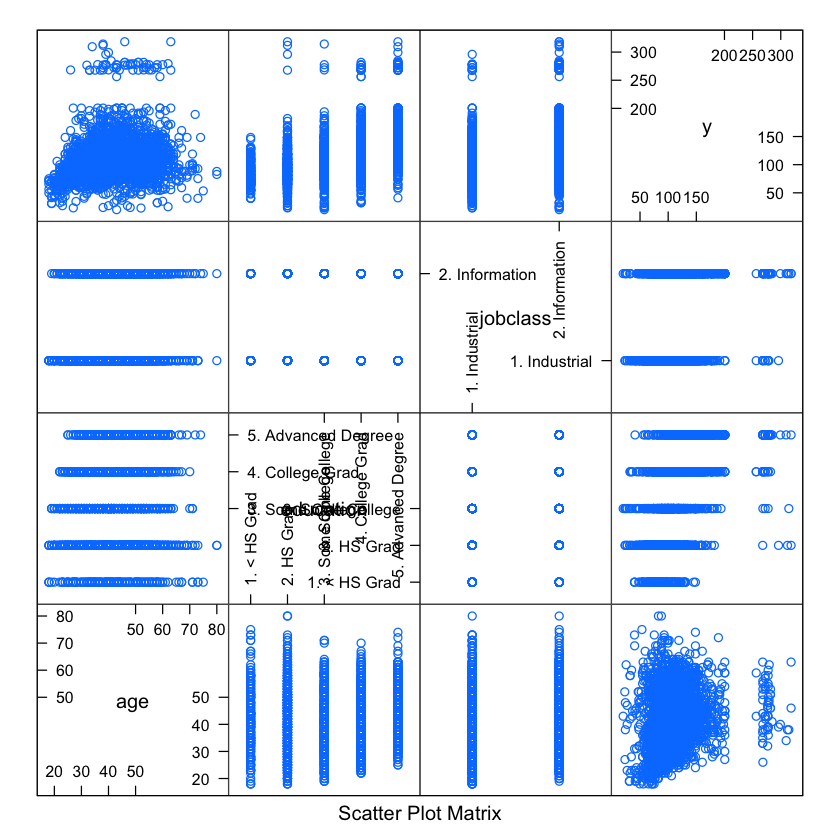

In [74]:
inTrain <- createDataPartition(y=Wage$wage, p=0.7, list=FALSE)
training <- Wage[inTrain,]
testing <- Wage[-inTrain,]
# featurePlot is from the Caret package
str(featurePlot)
wagefeaturePlot <- featurePlot(x=training[,c('age', 'education', 'jobclass')], 
                               y=training$wage,
                               plot='pairs')
wagefeaturePlot

#### Scatter Plot

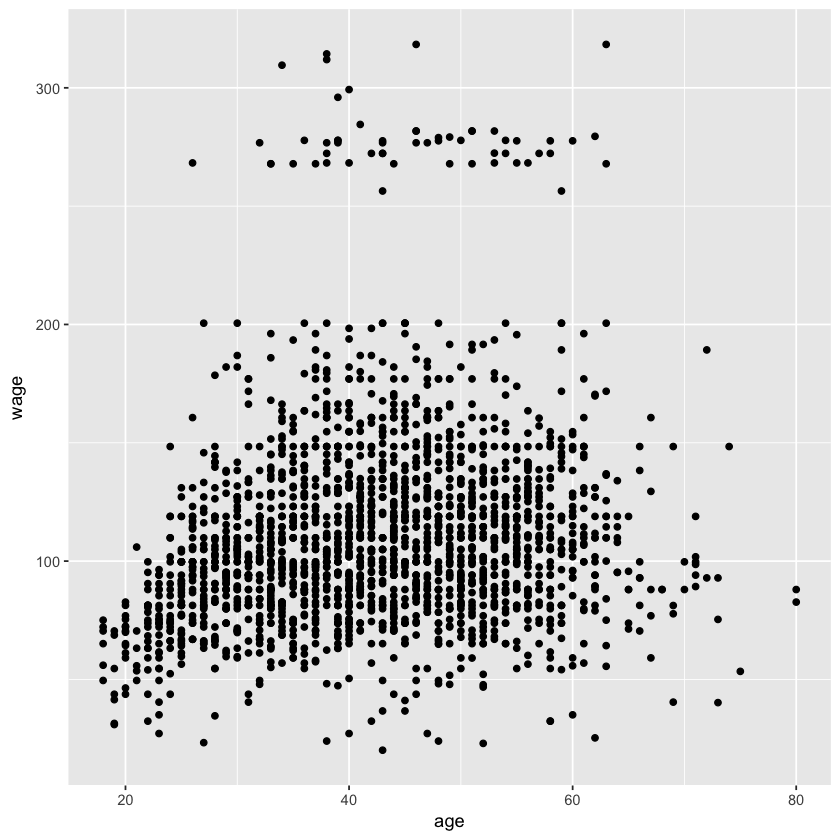

In [77]:
# Q Plot
# Q plot is from ggplot2. For simple plots. Meant to be like a wrapper around plot().
qplot(age, wage, data=training)

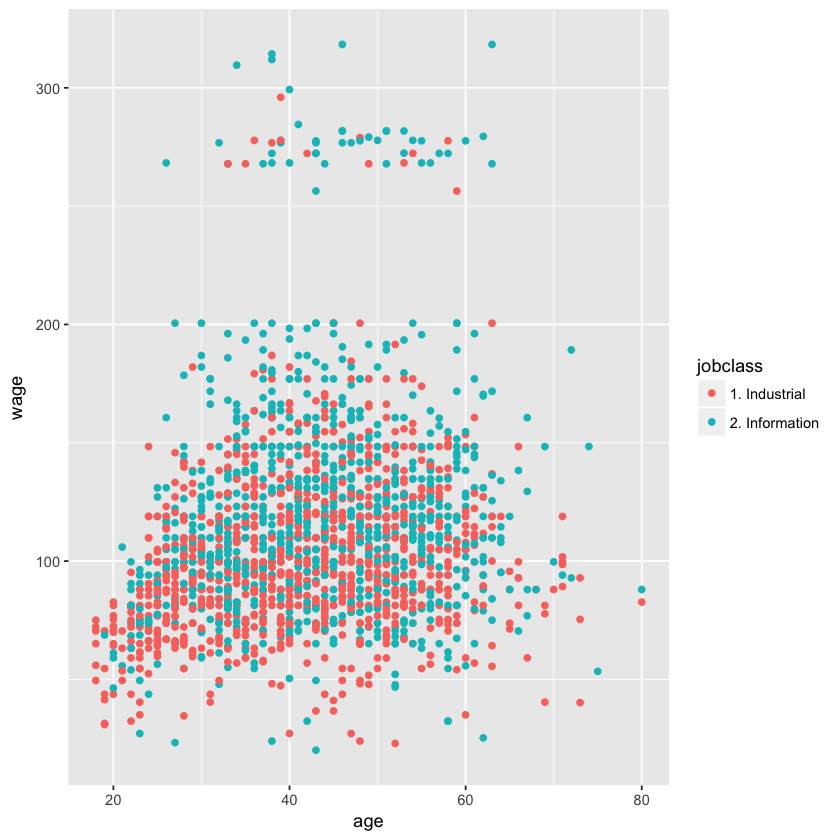

In [76]:
# Coloring
qplot(age, wage, colour=jobclass, data=training)

#### Scatter Plot w/ Regression Smoothing

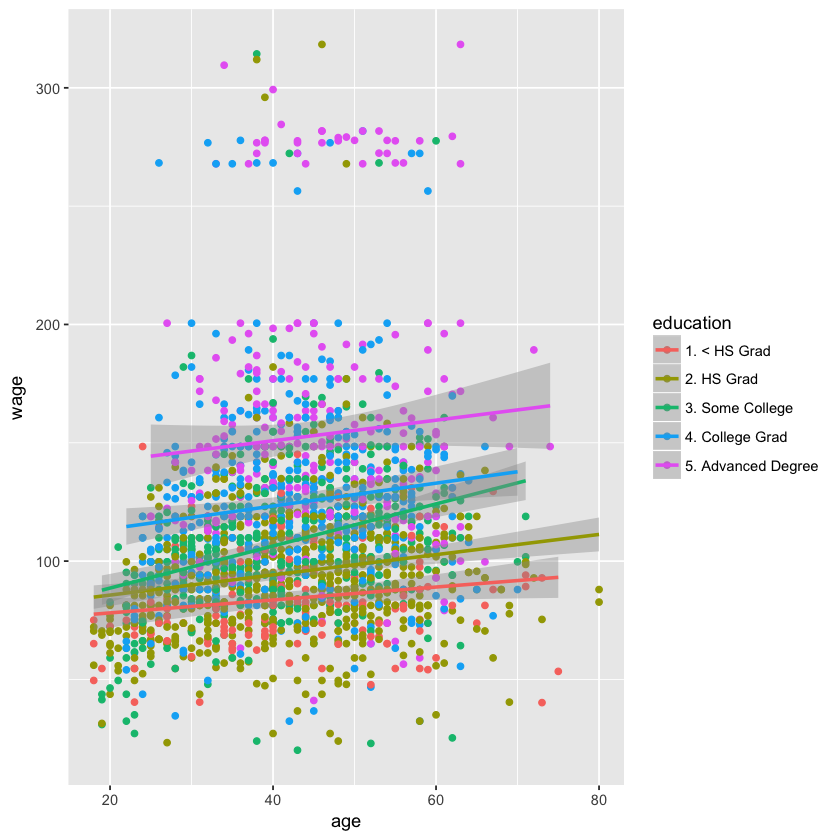

In [79]:
# Regression smoothers
# y~x is shorthand for "y = mx + b".
myPlot <- qplot(age, wage, colour=education, data=training)
myPlot2 <- myPlot + geom_smooth(method='lm', formula=y~x); myPlot2

#### Cutting into Quantile Factors

In [96]:
# How does the splitting work exactly?
library(Hmisc)
cutWage <- cut2(training$wage, g=3)

#### Tables

In [97]:
table(cutWage)
t1 <- table(cutWage, training$jobclass); t1
# Proportions
# For 2nd argument, 1 is for 'row', and 2 is for 'col'.
prop.table(t1, 1)

cutWage
[ 20.1, 92.3) [ 92.3,118.9) [118.9,318.3] 
          701           722           679 

               
cutWage         1. Industrial 2. Information
  [ 20.1, 92.3)           449            252
  [ 92.3,118.9)           372            350
  [118.9,318.3]           261            418

               
cutWage         1. Industrial 2. Information
  [ 20.1, 92.3)     0.6405136      0.3594864
  [ 92.3,118.9)     0.5152355      0.4847645
  [118.9,318.3]     0.3843888      0.6156112

#### Box Plot
http://www.physics.csbsju.edu/stats/box2.html

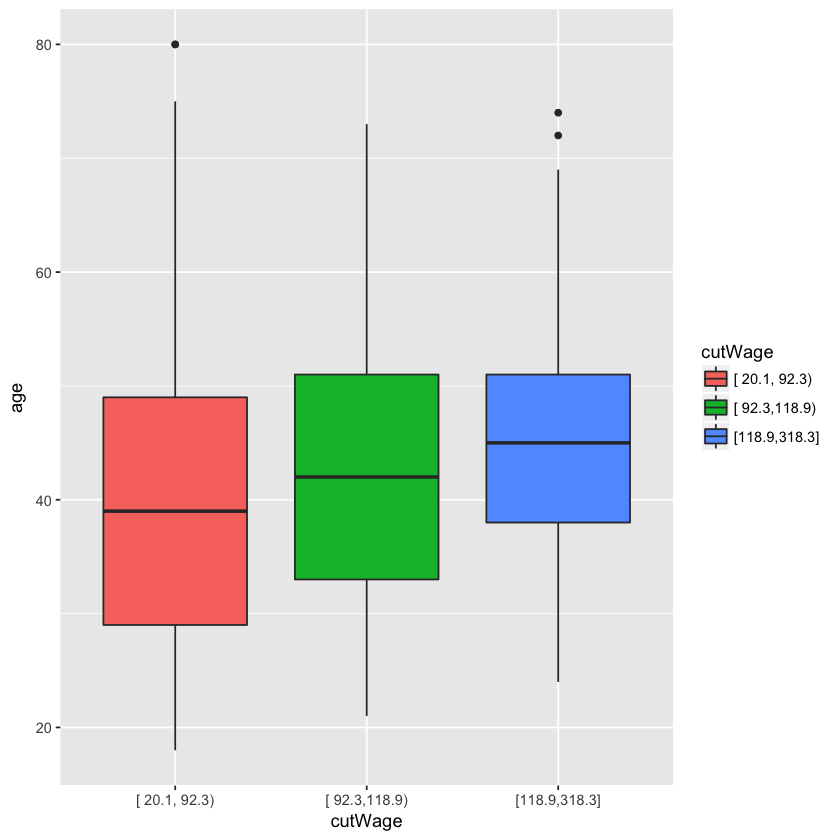

In [83]:
myPlot <- qplot(cutWage, age, data=training, fill=cutWage, geom=c('boxplot')); myPlot

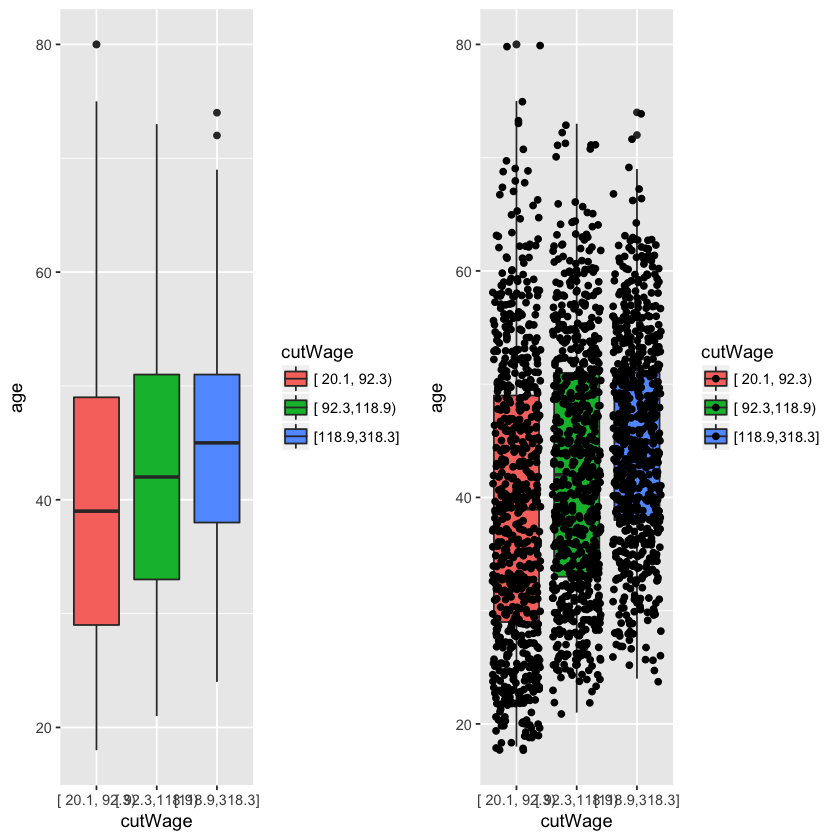

In [90]:
# Including 'jitter' is good because otherwise, box plots do not show data points. So if you have clustering in data points, it would otherwise not appear.
myPlot2 <- qplot(cutWage, age, data=training, fill=cutWage, geom=c('boxplot', 'jitter'))
library(gridExtra)
grid.arrange(myPlot, myPlot2, ncol=2)

#### Density Plot

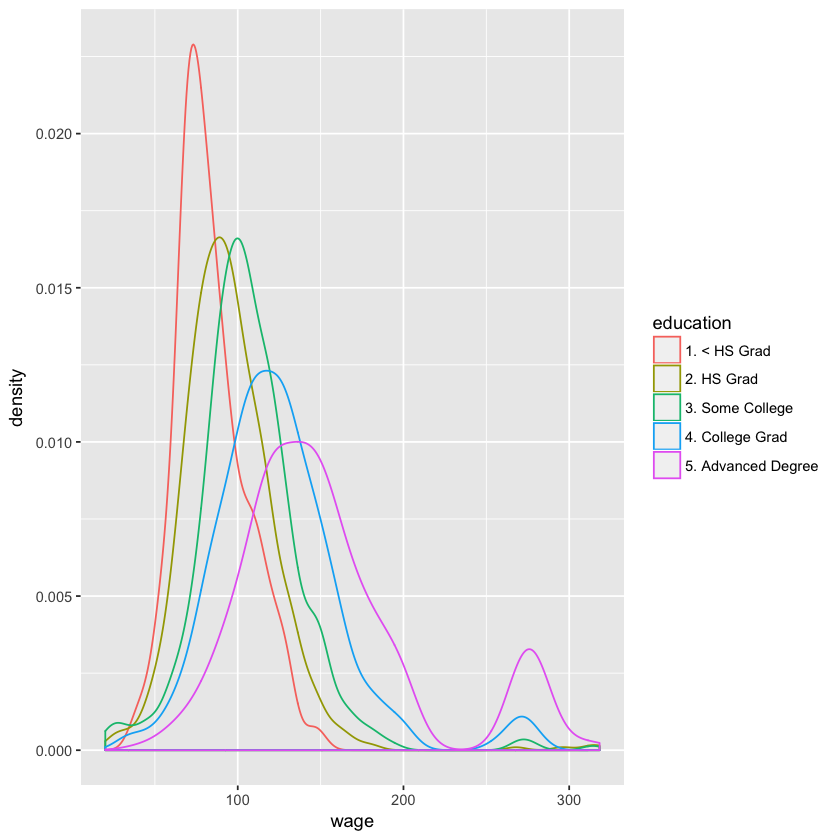

In [100]:
densityPlot <- qplot(wage, colour=education, data=training, geom='density'); densityPlot

#### Data Exploration for Feature Selection
- Use only training data.
- Look for:
 - Imbalance in outcomes and feature/predictor candidates
  - Suggest not enough data / not a good feature?
 - Outliers
  - Suggest perhaps variables that are missing?
 - Clustering not explained by any/a predictor
 - Skewed variables
  - Might want to normalize to a normal distribution if using a regression model.
  - Doesn't matter as much for "more machine learning methods."

### VIII. Basic Pre-Processing
One major use case for pre-processing is for transformation of irregular variables. Particularly true with model-based algorithms, such as: linear discrimate analysis, naive bayes, etc.

At my time of this writing, it appears that most/all of the pre-processing offered involves some data transformation.

Loading required package: lattice
Loading required package: ggplot2
Warning message in as.POSIXlt.POSIXct(Sys.time()):
“unknown timezone 'zone/tz/2017c.1.0/zoneinfo/America/New_York'”
Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha



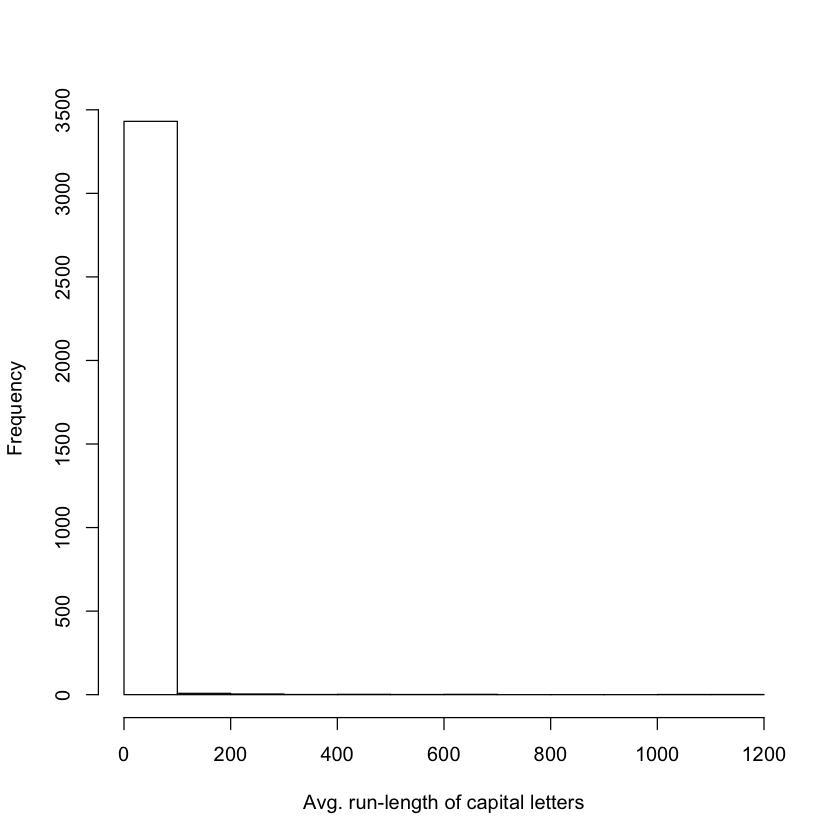

In [2]:
# Example of a good variable to pre-process
library(caret); library(kernlab); data(spam)
set.seed(32323)
inTrain <- createDataPartition(y=spam$type, p=0.75, list=FALSE)
training <- spam[inTrain, ]
testing <- spam[-inTrain, ]
hist(training$capitalAve, main='', xlab='Avg. run-length of capital letters')  # very skewed

In [6]:
mean(training$capitalAve)
sd(training$capitalAve)  # very skewed

[1] 5.689484

[1] 36.07091

#### Feature Scaling
Make it so that the variable ranges from 0.0 to 1.0. This is also called just "normalization" at times.

Note that while standardization and normalization are two different things, their definitions can be swapped: 
> In the business world, "normalization" typically means that the range of values are "normalized to be from 0.0 to 1.0". "Standardization" typically means that the range of values are "standardized" to measure how many standard deviations the value is from its mean. However, not everyone would agree with that. It's best to explain your definitions before you use them.

https://stats.stackexchange.com/questions/10289/whats-the-difference-between-normalization-and-standardization

Standardization, shown below, is another common type of "normalization". There are several other statistical methods that bear the same monicker. In this sense, normalization means "to eliminate abnormalities between data sets; to make data comparable to one another", I would say. This is as opposed to the 'normal' in a 'normal distribution'. http://www.statisticshowto.com/normalized/

#### A. Normalizing Data
#### Variable Standardization *($z$ or $t$ score)*
$z = \frac{(X - \mu)}{\sigma}$  

In the R caret package, this can be achieved via supplying the arguments `'center'` and `'scale'` to the `method` parameter of the `preProcess` function parameter of the `train` function, as follows: `preProcess(..., method=c('center', 'scale), ...)`.

$z$ is a vector of the standardized variable values (observation), $X$ is a vector of original variable values (observations), and $\mu$ and $\sigma$ of course are mean and standard deviations of the whole vector of original observations.

A standardized distribution will have the following properties:
- Mean ($\mu$) of 0.
- Standard deviation ($\sigma$) of 1.

The graph of standardized values will have exactly the same shape as the graph of raw data, but it may be a different size and have different coordinates.  
http://www.statisticshowto.com/standardized-values-examples/

In [7]:
# Standardized mean is supposed to be '0', but I'm seeing it as 'virtually 0'. Same result in the course I watched. Is that normal?
tca <- training$capitalAve
tcaS <- (tca - mean(tca)) / sd(tca)
mean(tcaS)
sd(tcaS)

[1] -1.113251e-17

[1] 1

When we apply a prediciton algorithm to the test set, we can only use what we learned in the training set. So if we standardize the testing set values, we will have to use the mean and standard deviation we got from the training set. So the mean will not be 0 and the standard deviation will not be 1.

Centering and scaling can remove very strongly biased predictors or predictors that have very high variability.

In [8]:
# In the example below, all independent variables are being standardized, and the dependent prediction variable (number 58) is not.
preObj <- preProcess(training[, -58], method=c('center', 'scale'))
predictions <- predict(preObj, training[, -58])
tcas <- trainCapAvgsStd <- predictions$capitalAve
# head(preObj)  <-- No. But why not?
head(training)
head(predictions)
mean(tcas); sd(tcas); head(tcas)


,make,address,all,num3d,our,over,remove,internet,order,mail,⋯,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
1,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0,0.000,0,0.778,0.00,0.000,3.756,61,278,spam
2,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,spam
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0,0.137,0,0.137,0.00,0.000,3.537,40,191,spam
5,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0,0.135,0,0.135,0.00,0.000,3.537,40,191,spam
6,0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0,0.223,0,0.000,0.00,0.000,3.000,15,54,spam
8,0.00,0.00,0.00,0,1.88,0.00,0.00,1.88,0.00,0.00,⋯,0,0.206,0,0.000,0.00,0.000,2.450,11,49,spam


,make,address,all,num3d,our,over,remove,internet,order,mail,⋯,conference,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal
1,-0.3346146,0.34141822,0.7298247,-0.05129958,0.007146948,-0.3633386,-0.3059816,-0.28205493,-0.3283645,-0.3625005,⋯,-0.1057672,-0.1571107,-0.487744175,-0.1453214,0.5967909,-0.3157939,-0.097350901,-0.05360232,0.03574287,0.0007066278
2,0.3221714,0.05630789,0.4484635,-0.05129958,-0.266055601,0.7222396,0.2686735,-0.09382351,-0.3283645,1.0129686,⋯,-0.1057672,-0.1571107,-0.020063183,-0.1453214,0.1216024,0.4551611,0.007039252,-0.01595425,0.22204198,1.3605054571
4,-0.3346146,-0.16544459,-0.5563980,-0.05129958,0.477662451,-0.3633386,0.5423188,1.41202786,0.7632010,0.5593565,⋯,-0.1057672,-0.1571107,-0.002347994,-0.1453214,-0.1534451,-0.3157939,-0.097350901,-0.05967369,-0.06206416,-0.1570300364
5,-0.3346146,-0.16544459,-0.5563980,-0.05129958,0.477662451,-0.3633386,0.5423188,1.41202786,0.7632010,0.5593565,⋯,-0.1057672,-0.1571107,-0.009434070,-0.1453214,-0.1557859,-0.3157939,-0.097350901,-0.05967369,-0.06206416,-0.1570300364
6,-0.3346146,-0.16544459,-0.5563980,-0.05129958,2.329368623,-0.3633386,-0.3059816,4.69263264,-0.3283645,-0.3625005,⋯,-0.1057672,-0.1571107,0.302353258,-0.1453214,-0.3137920,-0.3157939,-0.097350901,-0.07456104,-0.17850111,-0.4054199559
8,-0.3346146,-0.16544459,-0.5563980,-0.05129958,2.374902381,-0.3633386,-0.3059816,4.77330325,-0.3283645,-0.3625005,⋯,-0.1057672,-0.1571107,0.242121616,-0.1453214,-0.3137920,-0.3157939,-0.097350901,-0.08980878,-0.19713102,-0.4144852814


[1] -1.113251e-17

[1] 1

[1] -0.05360232 -0.01595425 -0.05967369 -0.05967369 -0.07456104 -0.08980878

It appears that we are not making a prediction when we use the `predict()` function, because it behaves quite dynamically (which doesn't seem like good design to me at the time of this writing). In the above example, it is not predicting, but normalizing data. From the `?predict` documentation:
> ‘predict’ is a generic function for predictions from the results
     of various model fitting functions.  The function invokes
     particular _methods_ which depend on the ‘class’ of the first
     argument.

##### Box Cox Transformations
Make continuous / non-normal data look like normal data. Do by estimating a specific set of parameters called maximum likelihood. http://www.statisticshowto.com/box-cox-transformation/

###### Set/Query of Graphical *Par*ameters `par()`
Also in the code snippet below is the `par()` function from the R standard library. The `mfrow` argument stands for "multiple figures; row first". Thus `mfrow=c(1,2)` means "the next array of figures to be drawn should be aligned in a grid of 1 row and 2 columns.

###### Quantile-Quantile Plots `qqnorm()`
`qqnorm` is a generic function the default method of which produces a normal QQ plot of the values in `y`. `qqline` adds a line to a “theoretical”, by default normal, quantile-quantile plot which passes through the `probs` quantiles, by default the first and third quartiles.

`qqplot` produces a QQ plot of two datasets.

A *qq plot* is designed to be a way to assess whether or not a set of values follows a particular distribution, usually a normal distribution. It can help ascertain how close the distribution is to a normal distribution in terms of quantile composition. A perfect 45 degree line represents a perfect distribution.

A few examples of distributions that are easy to ascertain by looking at a qq plot instead are the normal distribution, fat tail distributions, or positive (to the left) or negative (to the right distributions.  https://www.youtube.com/watch?v=-KXy4i8awOg

###### Normal Distribution Refresher
The name "normal" doesn't mean anything substantive, and simply carries the name due to a historical mistake. The term "Gaussian" is perhaps more appropriate, as is the "bell curve".

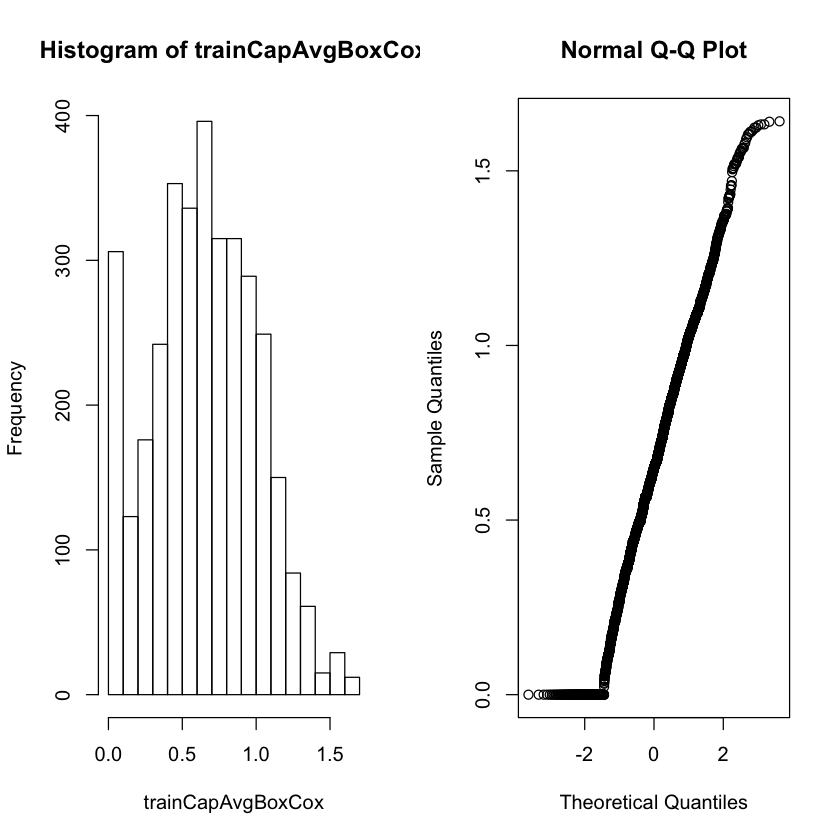

In [10]:
preObj <- preProcess(training[,-58], method=c('BoxCox'))
trainCapAvgBoxCox <- predict(preObj, training[,-58])$capitalAve
par(mfrow=c(1,2)); hist(trainCapAvgBoxCox); qqnorm(trainCapAvgBoxCox)

#### B. Imputation
Imputation is the calculated inference of a missing data point.



In [11]:
library(RANN)
set.seed(13343)
training$capAve <- training$capitalAve

# Make some NA values
# size: number of trials (zero or more), prob: probability of success on each trial.
selectNA <- rbinom(dim(training)[1], size=1, prob=0.05)==1
c('rows, cols: ', dim(training))
c('rows: ', dim(training)[1])
tail(selectNA)
training$capAve[selectNA] <- NA
tail(training$capAve)

# Impute and standardize
preObj <- preProcess(training[,-58], method='knnImpute')
capAve <- predict(preObj, training[,-58])$capAve
tail(capAve)

# Standardize (z scores) true values
capAveTruth <- x <- training$capitalAve
capAveTruth <- (x - mean(x)) / sd(x)  # What is this formula?
tail(capAveTruth)

[1] "rows, cols: " "3451"         "59"

[1] "rows: " "3451"

[1] FALSE FALSE FALSE FALSE FALSE  TRUE

[1] 1.727 1.000 1.555 1.404 1.147    NA

[1] -0.10803201 -0.12786222 -0.11272361 -0.11684241 -0.12385254 -0.09571928

[1] -0.1098526 -0.1300074 -0.1146210 -0.1188072 -0.1259321 -0.1230766

###### K's Nearest Neighbors (KNN)
A *classificaiton algorithm* that takes parameters: (1) who are my neighbors, (2) what class do they belong to, (3) how many neighbors of a particular class are close? $K$ represents the number of nearest neighbors.

A classification problem requires...
- A dataset of points, $(x_1,y_1),...,(x_n,y_n)$.
  - $x$ being a member of the set of $d$ dimensional real space, $x\in \mathbb{R}^d$.
  - $y$ is a member of a finite set.
    - *For example, a binary set as in binary classification, $y\in \{0,1\}$.

1. To find nearest neighbors, take the circle of a given radius in feature space and tally neighbors. KNN can utilize one of many valid proximity metrics, such as: Euclidian Distance, Hamming Distance, Manhattan Distance (City Block), Minkowsky, Chebychev Distance, etc.

Parameter Selection
- Oddity: $K$ should always be an odd number to avoid a draw in votes.
- Selecting $K$: The best choice of k depends upon the data; generally, larger values of k reduce the effect of noise on the classification, but make boundaries between classes less distinct. A good k can be selected by various heuristic techniques (see hyperparameter optimization). The special case where the class is predicted to be the class of the closest training sample (i.e. when k = 1) is called the nearest neighbor algorithm.

Advantages
- Robust to noisy training data.
- Effective with large training data.
- No training phase.
- Learns complex models easily.

Disadvantages
Need to determine value of parameter $K$. Hard to apply in high dimensions (needs dimensionality reduction?).
With low dimensions:
- OK

With high dimmenions:
- Low computational efficiency
- Large amount of data storage required
- Distnace between data objects less clear
- Distance metric to use not clear
- Attribute to use less clear
- Data sparsity
- False intuition

### IX. Covariate Creation
#### Feature Selection
Covariate = feature.

Types/Stages:
1. Raw to covariate
  - e.g. a raw e-mail, to a number of $ signs int he e-mail.
2. Tidy covariates to new, transformed
  - e.g. Number of dollar signs * some coefficient.
  - e.g. factor variable `jobs = ('industrial', 'information')` -> dummy variable `is_industrial, is_information = (0, 1)`
  - Useful for some methods (SVMs, regression) and not others (classification trees).

Useful feature selection steps:
- Remove 'zero' covariates
  - These are covariates that have very little variability.
  - e.g. 'is_edible' in the context of an inventory of a refrigerator. Nearly everything will be edible essentially, so this feature is not useful and should be removed from the model.

###### Covariate Creation by splitting Factor Variables into "`len(factor)`" number of binary variables

In [1]:
library(ISLR); library(caret); data(Wage)
inTrain <- createDataPartition(y=Wage$wage, p=0.7, list=FALSE)
training <- Wage[inTrain,]; testing <- Wage[-inTrain,]

table(training$jobclass)
# In the example below, expression "wage ~ jobclass" is short for "wage depends on job class".
dummies <- dummyVars(wage ~ jobclass, data=training)
head(predict(dummies, newdata=training))

Loading required package: lattice
Loading required package: ggplot2
Warning message in as.POSIXlt.POSIXct(Sys.time()):
“unknown timezone 'zone/tz/2017c.1.0/zoneinfo/America/New_York'”


 1. Industrial 2. Information 
          1094           1008 

,jobclass.1. Industrial,jobclass.2. Information
231655,1,0
86582,0,1
161300,1,0
11443,0,1
376662,0,1
450601,1,0


#### Creating Covariates by transforming tidy (raw) variables polynomially
###### Fitting Curved Lines (Basis Functions)
In mathematics, a basis function is a single function of a particular basis for a function space.

This explanation will be clearer by leading up to it. The [domain](https://en.wikipedia.org/wiki/Domain_of_a_function) and codomain (more ambiguously: the "range") are sets of all possible inputs and outputs of a particular function that connects them. A function that maps from one to the other is a basis function. A function space is the space occupied by all vectors leading from all points/values in input set a (domain) leading to output set b (codomain). A basis (maybe better called "basis space"?) is a name for the space occupied by all of the individual function spaces.

##### Polynomials Refresher
In mathematics, a polynomial is an expression consisting of variables (also called indeterminates) and coefficients, that involves only the operations of addition, subtraction, multiplication, and non-negative integer exponents of variables. An example of a polynomial of a single indeterminate x is $x^2 − 4x + 7$. An example in three variables is $x^3 + 2xyz^2 − yz + 1$.

###### Splines Package
This is a package for *fitting curved lines*.

The `bs()` function is used to generate the B-spline basis matrix for a polynomial spline. The `df` parameter stands for "degrees of freedom". In the example below, *1* is the actual value, *2* is something like the value squared (quadratic relationship), and *3* is the value cubed (cubic relationship).

In [7]:
library(splines)
bsBasis <- bs(training$age, df=3); head(bsBasis)

1,2,3
0.0000000,0.00000000,0.000000000
0.2368501,0.02537679,0.000906314
0.4163380,0.32117502,0.082587862
0.3625256,0.38669397,0.137491189
0.3063341,0.42415495,0.195763821
0.4241549,0.30633413,0.073747105


In the example below, a linear model is created to predict wage based on a basis function derived from age. Then this model is applied to the actual data. The data just happens to be the same as that which trained the model.

**#PCH**
In the example below, the argument "pch" stands for "**p**lot **ch**aracter id". Here is a lookup table for such plot characters: http://www.endmemo.com/program/R/pchsymbols.php

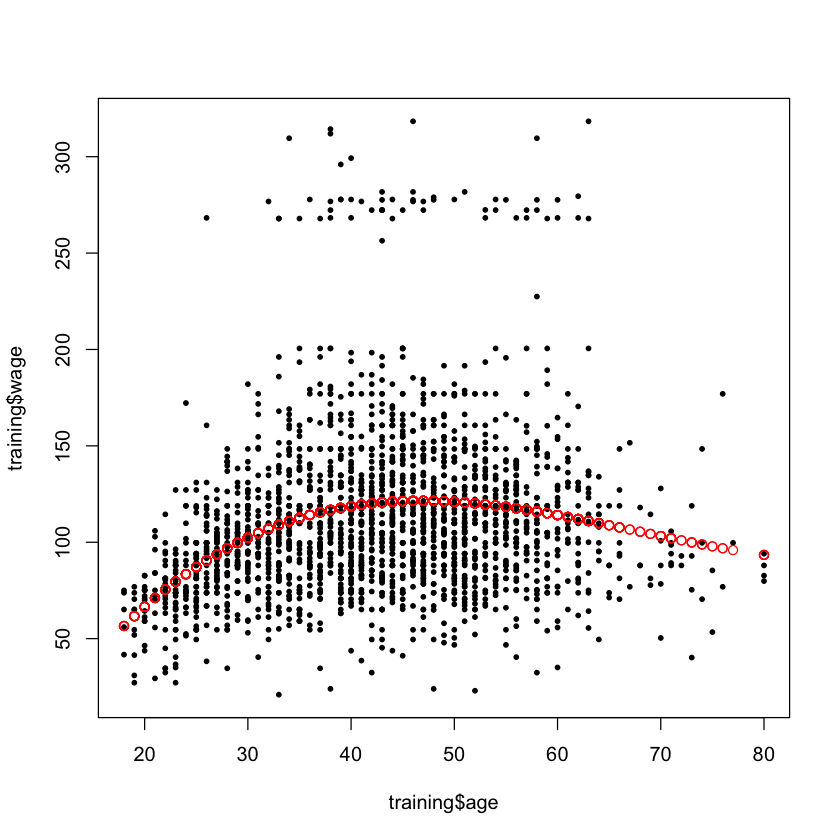

In [10]:
linModel1 <- lm(wage ~ bsBasis, data=training)
plot(training$age, training$wage, pch=19, cex=0.5)
points(training$age, predict(linModel1, newdata=training, pch=19, cex=0.5), col="red")

In [ ]:
# Can then apply on the test set
predict(bsBasis, age=testing$age)

#### Other tips for covariate creation
###### Level 1 Feature Creation (Raw Data to Covariates)
- Science/application-use-case/domain knowledge is key.
- Can Google "feature extraction for [data type]".
 - e.g. image, voice, etc.
 - Can try to learn more about that data type or format to try and figure out salient characteristics.
- Err on the side of over creation (can be filtered out later).
- Feature extraction for more complex situations using more complex models (e.g. deep learning), such as sense data (image/sound) can be automated, and this is usually better in those situations.

###### Level 2 Feature Creation (Covariates to New Ones)
- Can be done in R using `preprocess()` in `caret`.
- Possible to over-create and over-fit here.
- For fitting spline models / curved lines, `gam()` in `caret` is good.

### X. Preprocessing with Principal Component Analysis (PCA)
We're looking for all of the variables with high correlation. In the example below, `cor()` gets the correlation of the prediction features/variables/covariates/columns, and `abs()` is for absolute value.

What is produced by "M" is a covariance matrix. ([1](https://en.wikipedia.org/wiki/Covariance_matrix)) ([2](https://stats.stackexchange.com/questions/180311/why-does-this-covariance-matrix-have-a-rank-of-n))

In such a matrix, there is one column for each variable, and one row for each of the same variables. Naturally then, when the same variables match up when comparing the row/column, the correlatoin will be 1.

After removing these "1" matches (possibly a problem if they are indeed 2 different variables?), we are left with a table where, if one looks up the row and col in the covariance matrix, it will reveal the correlation value (in this case, all of them will be above 0.8).

In [20]:
library(caret); library(kernlab); data(spam)
inTrain <- createDataPartition(y=spam$type, p=0.75, list=FALSE)
training <- spam[inTrain, ]
testing <- spam[-inTrain, ]
M <- abs(cor(training[,-58]))
head(M)
diag(M) <- 0  # Matrix diagonals. Sets variables that correlate with themselves (1) equal to 0 since that's not interesting.
which(M > 0.8, arr.ind=T)  # Which correlate over 0.8? arr.ind=T gets rows/cols instead of integer for matrix index.

,make,address,all,num3d,our,over,remove,internet,order,mail,⋯,conference,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal
make,1.00000000,0.014047490,0.05993212,0.011373289,0.02177561,0.067385740,0.002010925,0.003940556,0.098204488,0.041160260,⋯,0.015794659,0.023409212,0.016586146,0.031235473,0.078090181,0.134457812,0.0106385068,0.042917964,0.059363431,0.087093948
address,0.01404749,1.000000000,0.03324236,0.005196308,0.02470676,0.026058397,0.003426660,0.015606194,0.005833273,0.032806225,⋯,0.014545626,0.009883615,0.050352155,0.018175045,0.015557355,0.008703465,0.0014476198,0.003222520,0.001202731,0.026334752
all,0.05993212,0.033242363,1.00000000,0.012836722,0.10195718,0.096410034,0.034858624,0.027550178,0.092779334,0.036165617,⋯,0.027672877,0.031974017,0.019746444,0.029369067,0.131568944,0.104831579,0.0022387409,0.082422952,0.092424646,0.066979055
num3d,0.01137329,0.005196308,0.01283672,1.000000000,0.02105427,0.009844125,0.016969071,0.013491327,0.009153307,0.007163912,⋯,0.002311719,0.002464652,0.008601253,0.005133929,0.001567089,0.002555652,0.0003794055,0.002302029,0.011302104,0.018774354
our,0.02177561,0.024706755,0.10195718,0.021054270,1.00000000,0.058987206,0.126401278,0.027794147,0.023700927,0.035491819,⋯,0.030448570,0.033132095,0.041279268,0.025458530,0.022809406,0.050028389,0.0024443424,0.051503499,0.050493114,0.006764392
over,0.06738574,0.026058397,0.09641003,0.009844125,0.05898721,1.000000000,0.054423114,0.057234760,0.110388631,0.010310855,⋯,0.029457874,0.023803958,0.001031372,0.025631258,0.065358351,0.092388859,0.0204209361,0.010751766,0.079823192,0.077018823


,row,col
num857,32,31
num415,34,31
telnet,31,32
num415,34,32
direct,40,32
telnet,31,34
num857,32,34
direct,40,34
num857,32,40
num415,34,40


So we see that certain variables, such as 857 and 415, are highly correlated (phone #)? So perhaps we can make a single variable out of them. A weighted combination of predictors might be better.

Idea is to pick the combination of covariates that picks "the most combination of information possible". Another way to phrase this is "Find a new set of multivariate variables that are satisfactorily uncorrelated and explain as much variance as possible." Is there a repeatable way to do this? Such as an ideal ratio? This, by the way, is a statistical goal.

Another similar problem is to find the best covariate matrix with fewer variables (lower [rank](http://stattrek.com/matrix-algebra/matrix-rank.aspx)) that explains the original data, which is data compression related.

Summary of benefits:
- Reduces number of predictors (just nice)
- Reduces noise (due to averaging)

A similar method to PCA is SVD (Singular Value Decomposition).

Below, we try to come up with a transformation from these two variables that caps out what is essential between these two variables. (I am not sure why the professor chose 0.71 randomly as a coefficient here as opposed to something else. I think this very kind of formalized anlaysis, rather than exploratory like in the example below, to try and find an ideal transformation for variables, is what is called PCA.) Here, we can see that the addition transformation captures what we want.

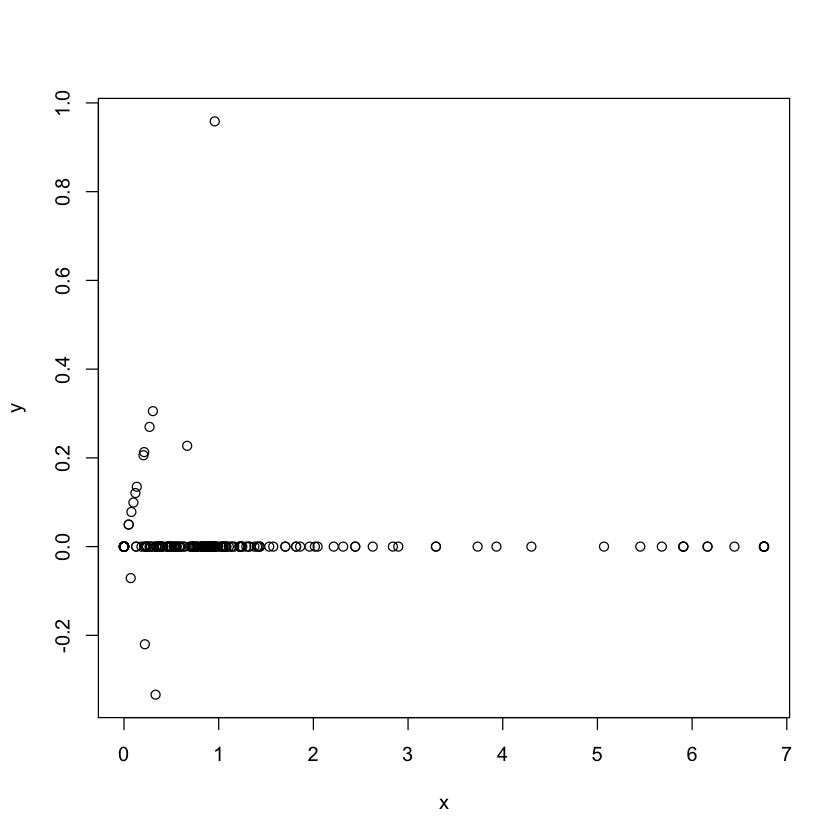

In [23]:
x <- 0.71*training$num415 + 0.71*training$num857
y <- 0.71*training$num415 - 0.71*training$num857
plot(x, y)

### XI. Predicting with Regression
Pros:
- Quick and dirty.

Cons:
- Not so great for non-linear models.

The data sets in the Anscombe's quartet are designed to have the same linear regression line (as well as identical means, standard deviations, and correlations) but are graphically very different. This illustrates the pitfalls of relying solely on a fitted model to understand the relationship between variables. [1](https://en.wikipedia.org/wiki/Linear_regression)

<img src="files/880px-Anscombe's_quartet_3.svg.png">

#### Example 1 - Old Faithful Eruptions
     A data frame with 272 observations on 2 variables.

       [,1]  eruptions  numeric  Eruption time in mins
       [,2]  waiting    numeric  Waiting time to next
                                 eruption (in mins)


In [46]:
library(caret); data(faithful); set.seed(333)
inTrain <- createDataPartition(y=faithful$waiting,
                               p=0.5, list=FALSE)
trainFaith <- faithful[inTrain,]; testFaith <- faithful[-inTrain,]
head(trainFaith)

,eruptions,waiting
1,3.600,79
3,3.333,74
5,4.533,85
6,2.883,55
7,4.700,88
8,3.600,85


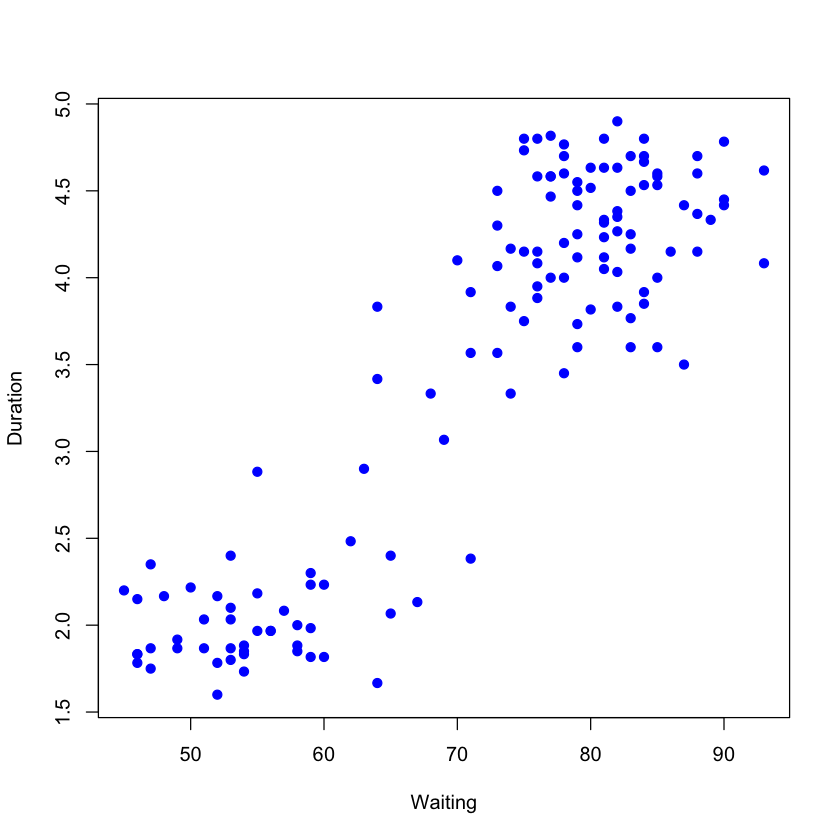

In [29]:
plot(trainFaith$waiting, trainFaith$eruptions, pch=19, col='blue', xlab='Waiting', ylab='Duration')

#### Formula for a Linear Model
$D_i = b_0 + b_1I + e_i$

Dependent variable observation = y-intercept + a constant times the independent variable observation + an error term of the observation. ([1](https://www.overleaf.com/13004493bxhjmfhngrrq#/49825416/))

<img src="files/linear_regression.png">

In [30]:
lm1 <- lm(eruptions ~ waiting, data=trainFaith)
summary(lm1)


Call:
lm(formula = eruptions ~ waiting, data = trainFaith)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26990 -0.34789  0.03979  0.36589  1.05020 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.792739   0.227869  -7.867 1.04e-12 ***
waiting      0.073901   0.003148  23.474  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.495 on 135 degrees of freedom
Multiple R-squared:  0.8032,	Adjusted R-squared:  0.8018 
F-statistic:   551 on 1 and 135 DF,  p-value: < 2.2e-16


As far as predicting a value for "eruptions" (the length of the eruption in units of time) based on "waiting" (the time passed since the last eruption), based on the `summary()` of our linear model `lm()` shown above, we would insert `-1.792739` as *the y-intercept* $b_0$ and `0.073901` as the *dependent variable multiplier* $b_1$. Of course, real observations would usually deviate from this predicted value, that deviation being represented by the *error term* $e_i$.

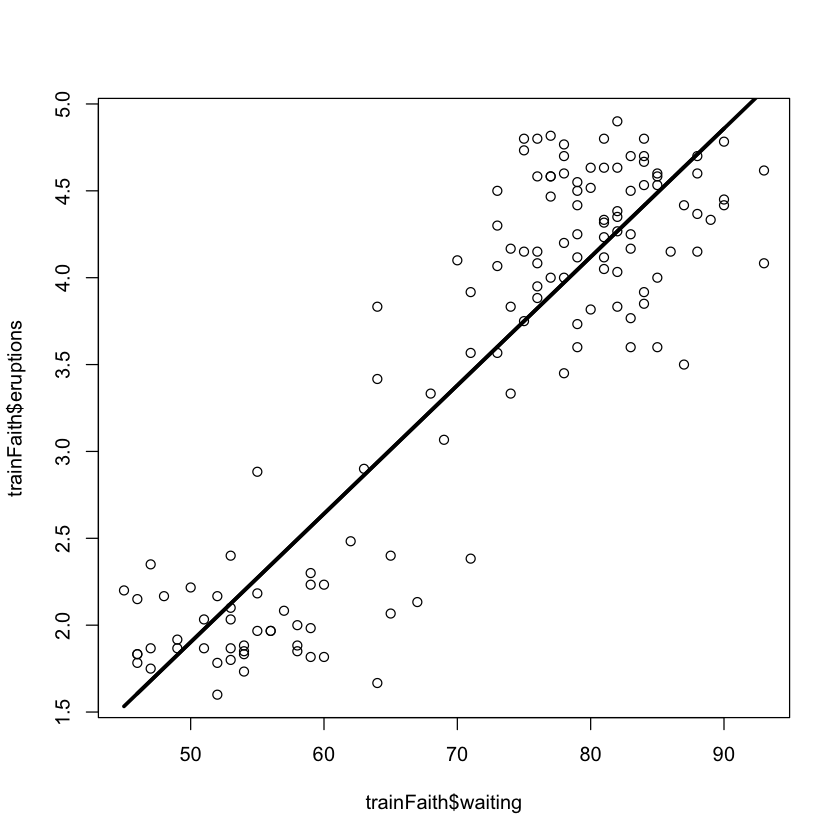

In [35]:
plot(trainFaith$waiting, trainFaith$eruptions)
lines(trainFaith$waiting, lm1$fitted, lwd=3) # lwd is for "line width"

#### Formula for Prediction of a Linear Model
$\hat{D} = \hat{b_0} + \hat{b_1}I$

In this example, the "hat" `^` represents that this variable is a prediction. In this example, $D$ is a predicted result. We don't have $e_i$ because we don't have an acdtual observation, as this is just a prediction. Also $b_0$ and $b_1$ are predictions because they are best guesses based on our model. That leaves just $I$ as the only part that is not a prediction, as we are declaring what it is up-front.

#### Predicting new values
We can manually calculate a new value by using `coef()[INDEX]` on our `lm()`. And we can also predict new values using a new data frame.

In [39]:
ex <- 80  # Example for a new independent variable
coef(lm1)[1] + coef(lm1)[2]*ex  # New predicted value
newdata <- data.frame(waiting=ex)
predict(lm1, newdata)

(Intercept) 
   4.119307

1 
4.119307

#### Getting training/test set error values
Here, we use root mean squared error (RSME).

In [49]:
sqrt(sum((lm1$fitted - trainFaith$eruptions)^2))
sqrt(sum((predict(lm1, newdata=testFaith) - testFaith$eruptions)^2))

[1] 5.75186

[1] 5.838559

As expected, and as will almost always be the case, the error on the test set is larger.

#### Prediction Intervals
`order()`

     ‘order’ returns a permutation which rearranges its first argument
     into ascending or descending order, breaking ties by further
     arguments. ‘sort.list’ is the same, using only one argument.
     See the examples for how to use these functions to sort data
     frames, etc.
`matlines()`

      Plot the columns of one matrix against the columns of another.

      col: vector of colors.  Colors are used cyclically.

      lty,lwd,lend: vector of line types, widths, and end styles.  The first
          element is for the first column, the second element for the
          second column, etc., even if lines are not plotted for all
          columns. Line types will be used cyclically until all plots
          are drawn.

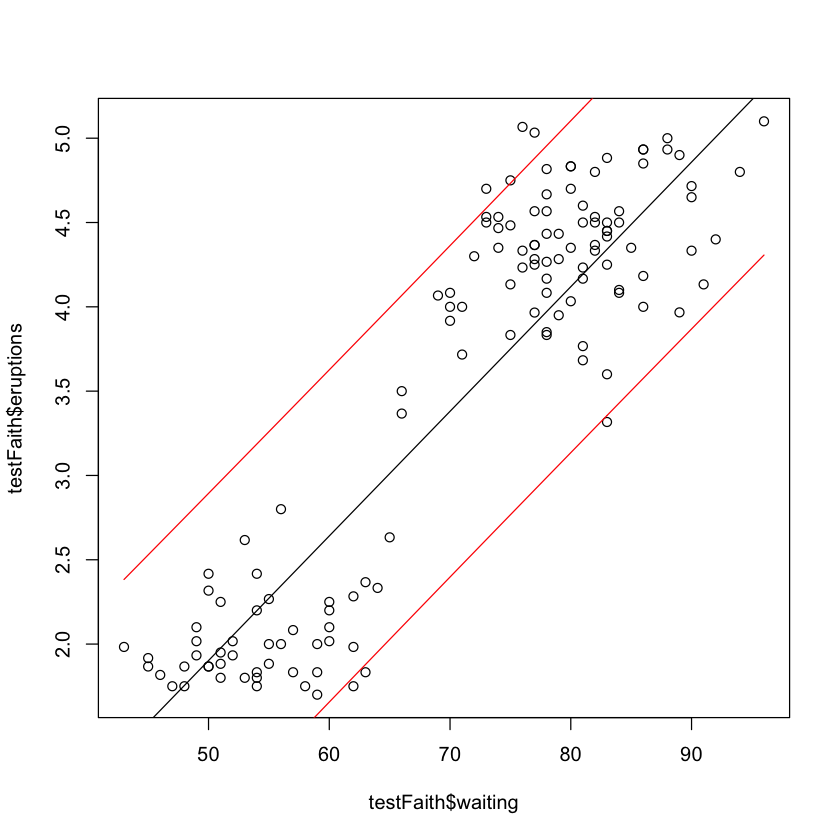

In [64]:
pred1 <- predict(lm1, newdata=testFaith, interval='prediction')
ord <- order(testFaith$waiting)
plot(testFaith$waiting, testFaith$eruptions)
# matlines(testFaith$waiting[ord], pred1[ord,], type='l')
matlines(testFaith$waiting[ord], pred1[ord,], type='l', col=c(1,2,2), lty=c(1,1,1))

The same process can be done with caret.

*Note: These means of modeling seem very similar, but but the outcomes are not the same. I wonder why the differences, as well as what the advantages may be for creating a linear model using caret. -jef 2017.12.31*

In [66]:
# lm1 <- lm(eruptions ~ waiting, data=trainFaith)  # without caret
# summary(lm1)
modFit <- train(eruptions ~ waiting, data=trainFaith, method='lm')  # with caret
summary(modFit$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26990 -0.34789  0.03979  0.36589  1.05020 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.792739   0.227869  -7.867 1.04e-12 ***
waiting      0.073901   0.003148  23.474  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.495 on 135 degrees of freedom
Multiple R-squared:  0.8032,	Adjusted R-squared:  0.8018 
F-statistic:   551 on 1 and 135 DF,  p-value: < 2.2e-16


#### How to calculate a linear regression manually

<img src="files/calculating_a_linear_regression/1.png">
<img src="files/calculating_a_linear_regression/2.png">
<img src="files/calculating_a_linear_regression/3.png">

#### Logicstic Regression vs Linear Regression
[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is for straight lines. [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) is for dichotomous dependent variables.

### XII. Predicting w/ Regression using Multiple Covariates
